In [1]:
from os.path import dirname, abspath, join
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean

dirPath = abspath(dirname(''))
data_file = '2020-02-23-19-21-54.bag.csv'

data_path = join(join(dirname(dirPath),'data'), data_file)

with open(data_path, 'r') as f:
    data_raw = pd.read_csv(f)

with open(join(join(dirname(dirPath),'data'), 'path.pkl'), 'rb') as f:
    path = pickle.load(f)

def moving_avg(poses, n):
    N = int(len(poses)/n)
    n = N
    moving_avg = []
    tmp = []
    for i in range(len(poses)):
        tmp.append(poses[i])
        if(i >= N):
            moving_avg.append(np.mean(tmp))
            tmp = []
            N = n+N
    return moving_avg

data_raw_200 = data_raw
path_200 = path
data_raw.head(10)

,t,speed,x_pos,y_pos,deviation,track_progress
0,0.000026,0.0,0.883381,0.105236,0.062983,NaN
1,0.000067,0.0,0.883381,0.105236,0.062983,NaN
2,0.000096,0.0,0.883381,0.105236,0.062983,NaN
3,0.000125,0.0,0.883381,0.105236,0.062983,NaN
4,0.000152,0.0,0.883381,0.105236,0.062983,NaN
5,0.000181,0.0,0.883381,0.105236,0.062983,NaN
6,0.000208,0.0,0.883381,0.105236,0.062983,NaN
7,0.000235,0.0,0.883381,0.105236,0.062983,NaN
8,0.000262,0.0,0.883381,0.105236,0.062983,NaN
9,0.000295,0.0,0.883381,0.105236,0.062983,NaN


Text(0.5, 1.0, 'speed')

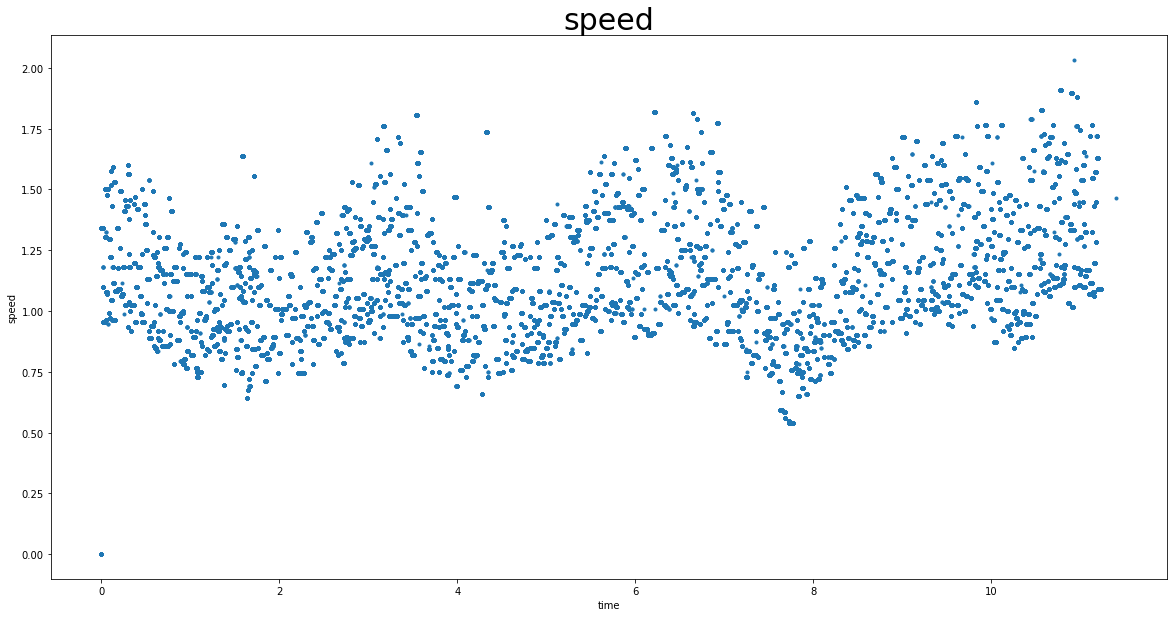

In [2]:
t = data_raw['t']
speed = data_raw['speed']
x_pos = data_raw['x_pos']
y_pos = data_raw['y_pos']
deviation = data_raw['deviation']

grad = 1
start = 0
end = 1200000

fig = plt.figure(figsize=(20,10))
plt.plot(t[start:end][::grad], speed[start:end][::grad], '.')
plt.xlabel('time')
plt.ylabel('speed')
plt.title('speed', fontsize=30)

In [17]:
x_pos_100 = x_pos
y_pos_100 = y_pos
ride_end_ind_100 = ride_end_ind
speed_100 = speed

path_x = [point['x'] for point in path_100]
path_y = [point['y'] for point in path_100]

fig = plt.figure(figsize=(20,10))
plt.scatter(x_pos_100, y_pos_100, c=speed_100, cmap='Spectral')
plt.plot(path_x, path_y, 'r.')
plt.legend(['actual path', 'wanted path'], loc='lower right', fontsize=20)
ax = plt.gca()
plt.colorbar()
ax.set_aspect('equal')
plt.title('')

NameError: name 'path_100' is not defined

# safety = 80

0.8833809225775606

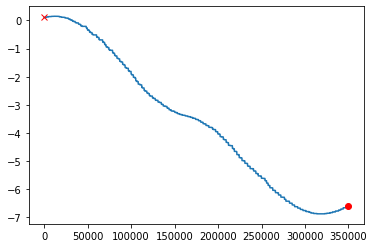

In [13]:
#data_raw = data_raw_80
#path = path_80
#ride_end_ind = ride_end_ind_100

t = data_raw['t']
speed = data_raw['speed']
x_pos = data_raw['x_pos']
y_pos = data_raw['y_pos']

plt.plot(y_pos)
ride_end_ind = 350000
ride_start_ind = 0
plt.plot(ride_end_ind, y_pos[ride_end_ind], 'or')
plt.plot(ride_start_ind, y_pos[ride_start_ind], 'xr')


speed = [s for s in speed[ride_start_ind:ride_end_ind]]
x_pos = [x for x in x_pos[ride_start_ind:ride_end_ind]]
y_pos = [y for y in y_pos[ride_start_ind:ride_end_ind]]

path_x = [point['x'] for point in path]
path_y = [point['y'] for point in path]

x_pos[0]

In [14]:
x_avg = moving_avg(x_pos, 1000)
y_avg = moving_avg(y_pos, 1000)
speed_avg = moving_avg(speed, 1000)

In [15]:
x_avg = [x+6 for x in x_avg]
y_avg = [y+6 for y in y_avg]
path_x = [x+6 for x in path_x]
path_y=[y+6 for y in path_y]

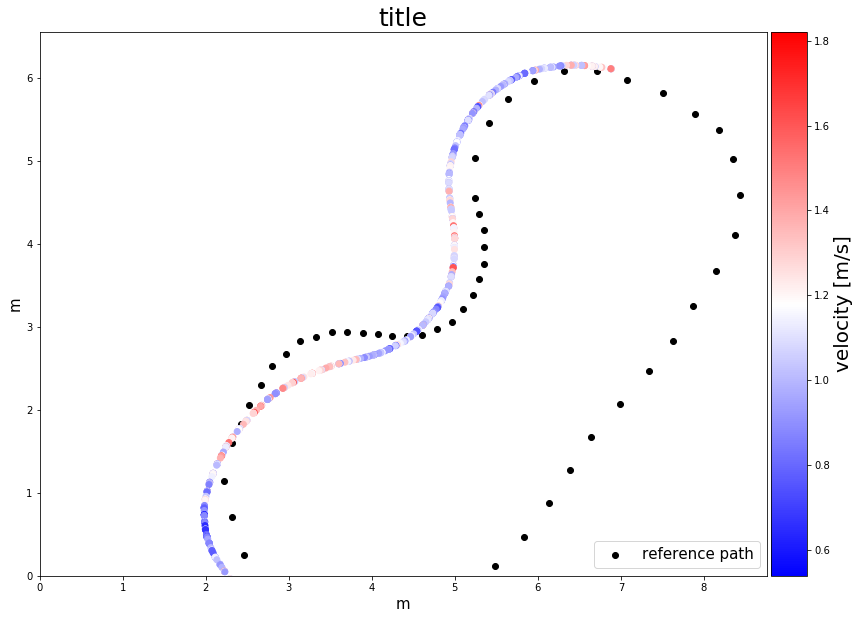

In [16]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plt.title('title', fontsize=25)
plt.xlabel('m', fontsize=15)
plt.ylabel('m', fontsize=15)
plt.scatter(path_x, path_y, color='black')
plt.legend(['reference path'], loc='lower right', fontsize=15)
im = plt.scatter(x_avg, y_avg, c=speed_avg, cmap='bwr')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im, cax=cax)
cb.set_label('velocity [m/s]', fontsize=20)

ax.set_aspect('equal')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.savefig('corn_sfty_80.png')

# safety=100

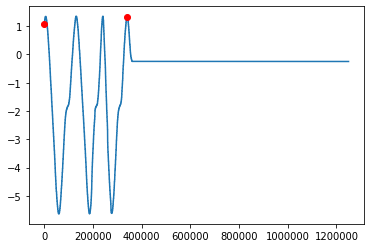

In [231]:
data_raw = data_raw_100
path = path_100
#ride_end_ind = ride_end_ind_100

t = data_raw['t']
speed = data_raw['speed']
x_pos = data_raw['x_pos']
y_pos = data_raw['y_pos']

plt.plot(y_pos)
ride_end_ind = 340000
ride_start_ind = 0
plt.plot(ride_end_ind, y_pos[ride_end_ind], 'or')
plt.plot(ride_start_ind, y_pos[ride_start_ind], 'or')


speed = [s for s in speed[ride_start_ind:ride_end_ind]]
x_pos = [x for x in x_pos[ride_start_ind:ride_end_ind]]
y_pos = [y for y in y_pos[ride_start_ind:ride_end_ind]]

path_x = [point['x'] for point in path]
path_y = [point['y'] for point in path]


In [232]:
x_avg = moving_avg(x_pos, 1000)
y_avg = moving_avg(y_pos, 1000)
speed_avg = moving_avg(speed, 1000)

In [233]:
x_avg = [x+6 for x in x_avg]
y_avg = [y+6 for y in y_avg]
path_x = [x+6 for x in path_x]
path_y=[y+6 for y in path_y]

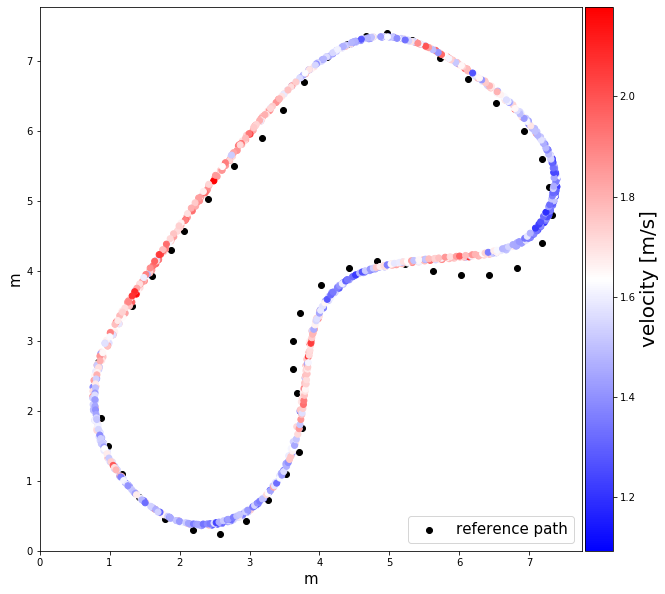

In [236]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plt.title('', fontsize=25)
plt.xlabel('m', fontsize=15)
plt.ylabel('m', fontsize=15)
plt.scatter(path_x, path_y, color='black')
plt.legend(['reference path'], loc='lower right', fontsize=15)
im = plt.scatter(x_avg, y_avg, c=speed_avg, cmap='bwr')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im, cax=cax)
cb.set_label('velocity [m/s]', fontsize=20)

ax.set_aspect('equal')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.savefig('corn_sfty_100.svg')

# safety = 200

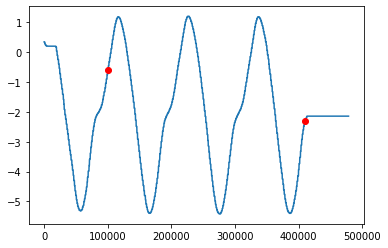

In [241]:
data_raw = data_raw_200
path = path_200

t = data_raw['t']
speed = data_raw['speed']
x_pos = data_raw['x_pos']
y_pos = data_raw['y_pos']

plt.plot(y_pos)
ride_end_ind = 410000
ride_start_ind = 100000
plt.plot(ride_end_ind, y_pos[ride_end_ind], 'or')
plt.plot(ride_start_ind, y_pos[ride_start_ind], 'or')


speed = [s for s in speed[ride_start_ind:ride_end_ind]]
x_pos = [x for x in x_pos[ride_start_ind:ride_end_ind]]
y_pos = [y for y in y_pos[ride_start_ind:ride_end_ind]]

path_x = [point['x'] for point in path]
path_y = [point['y'] for point in path]

In [242]:
x_avg = moving_avg(x_pos, 1000)
y_avg = moving_avg(y_pos, 1000)
speed_avg = moving_avg(speed, 1000)

x_offset = 6
y_offset = 6
x_avg = [x+x_offset for x in x_avg]
y_avg = [y+y_offset for y in y_avg]
path_x = [x+x_offset for x in path_x]
path_y=[y+y_offset for y in path_y]

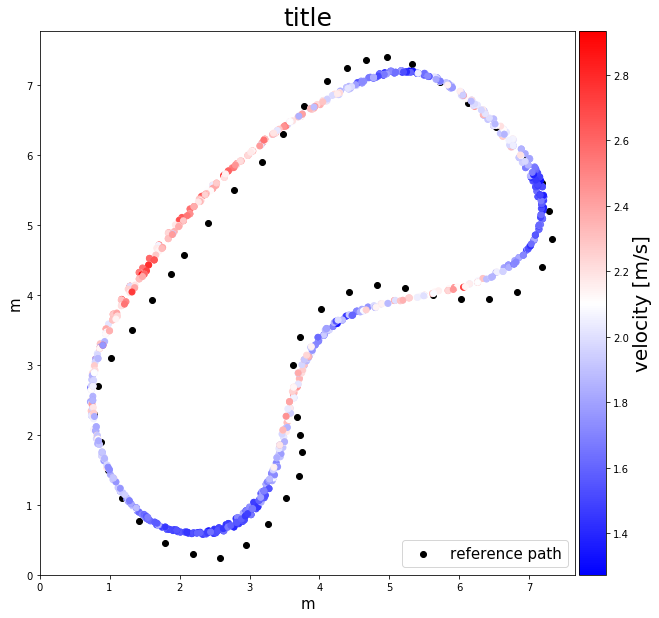

In [243]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plt.title('title', fontsize=25)
plt.xlabel('m', fontsize=15)
plt.ylabel('m', fontsize=15)
plt.scatter(path_x, path_y, color='black')
plt.legend(['reference path'], loc='lower right', fontsize=15)
im = plt.scatter(x_avg, y_avg, c=speed_avg, cmap='bwr')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im, cax=cax)
cb.set_label('velocity [m/s]', fontsize=20)

ax.set_aspect('equal')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.savefig('corn_sfty_200.png')

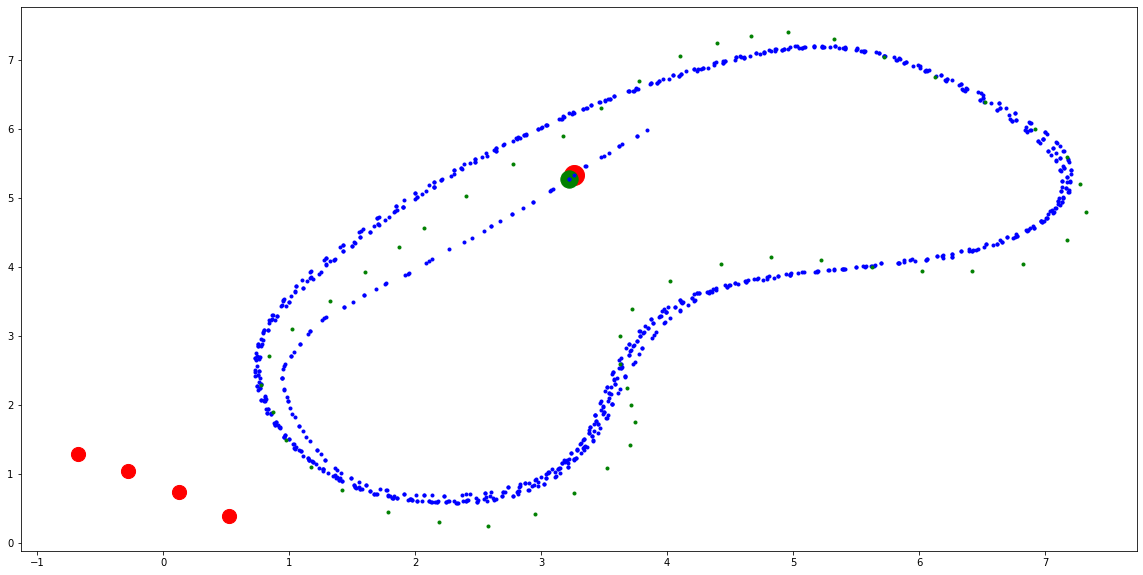

In [240]:
def find_closests_points(pose, path, n_points):
    x = pose['x']
    y = pose['y']
    ref_path = path[:]
    distances = [(path_point['x']-x)**2 + (path_point['y']-y)**2 for path_point in ref_path]
    min_elems = []
    min_indexes = []
    for i in range(n_points):
        min_ind = np.argmin(distances)
        min_elems.append(ref_path[min_ind])
        min_indexes.append(min_ind)
        del distances[min_ind]
        del ref_path[min_ind]
    return {'elems':min_elems, 'index':min_indexes}

el = 11
fig = plt.figure(figsize=(20,10))
plt.plot(x_avg, y_avg, '.b')
plt.plot(path_x, path_y, 'g.')
pose = {'x':x_avg[el], 'y':y_avg[el]}
plt.scatter(pose['x'], pose['y'], marker='o', s=400, c='r')
plt.scatter(x_avg[el+1], y_avg[el+1], marker='o', s=300, c='g')
closests = find_closests_points(pose, path, 4)['elems']
for closest in closests:
    plt.scatter(closest['x'], closest['y'], s=200, c='r')

In [247]:
path_x_100

TypeError: list indices must be integers or slices, not str